# 분류

In [13]:
# 필요한 라이브러리 로드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
# scikit-learn toy dataset 로드
# Classification 문제를 위한 와인 종류 분류 데이터셋을 로드
wine = datasets.load_wine()
# 데이터 프레임으로 변환
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [14]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [16]:
# 모델의 이해를 위해 Feature를 2개만 사용
X = df[['alcohol', 'malic_acid']]
y = df['target']

In [17]:
y.value_counts()


,count
target,
1,71
0,59
2,48


In [18]:
# 학습/테스트 데이터셋 분리
train_X, test_X, train_y, test_y = train_test_split (X,y, test_size=0.2, random_state=42)

In [20]:
train_X.shape, test_X.shape

((142, 2), (36, 2))

In [21]:
# 학습/평가 데이터 분리
train_sub_X, val_X, train_sub_y, val_y = train_test_split (train_X, train_y, test_size=0.4, random_state=42)

In [22]:
train_sub_X.shape, val_X.shape

((85, 2), (57, 2))

In [24]:
# 모델 학습 (max_depth=2일 때)
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 accuracy: 0.8352941176470589
평가용 데이터셋 accuracy: 0.7719298245614035


[Text(0.5, 0.8333333333333334, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.25, 0.5, 'malic_acid <= 4.515\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.202\nsamples = 35\nvalue = [0, 31, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'malic_acid <= 2.335\ngini = 0.586\nsamples = 48\nvalue = [23, 5, 20]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.435\nsamples = 29\nvalue = [21, 5, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.188\nsamples = 19\nvalue = [2, 0, 17]')]

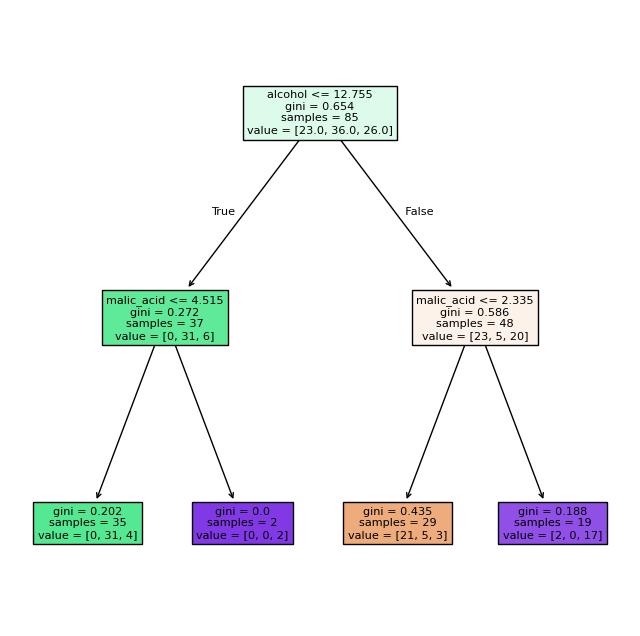

In [25]:
# 의사결정 나무 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid'])

In [30]:
# 모델 학습 (max_depth=2일 때)
model_entropy = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=6, random_state=42)
model_entropy.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model_entropy.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model_entropy.score(val_X, val_y)))
print("테스트 데이터셋 accuracy: {}".format(model_entropy.score(test_X, test_y)))

훈련 데이터셋 accuracy: 0.8470588235294118
평가용 데이터셋 accuracy: 0.7192982456140351
테스트 데이터셋 accuracy: 0.8333333333333334


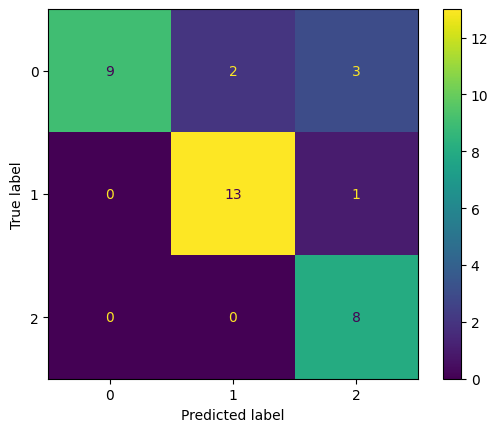

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pred_y = model_entropy.predict(test_X)
cm = pd.crosstab(test_y, pred_y, rownames=['Actual'], colnames=['Predicted'])
cm

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()

[Text(0.4583333333333333, 0.875, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.25, 0.625, 'malic_acid <= 2.455\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'alcohol <= 12.355\ngini = 0.074\nsamples = 26\nvalue = [0, 25, 1]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(0.25, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.496\nsamples = 11\nvalue = [0, 6, 5]'),
 Text(0.6666666666666666, 0.625, 'malic_acid <= 2.335\ngini = 0.586\nsamples = 48\nvalue = [23, 5, 20]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'malic_acid <= 1.54\ngini = 0.435\nsamples = 29\nvalue = [21, 5, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.234\nsamples = 23\nvalue = [20, 1, 2]'),
 Text(0.8333333333333334,

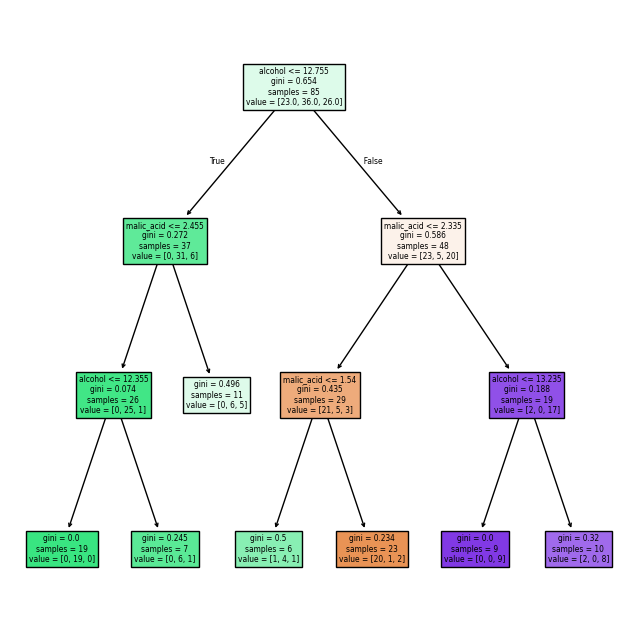

In [32]:
# 의사결정 나무 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(model_entropy, filled=True, feature_names=['alcohol', 'malic_acid'])

In [34]:
# 모델 평가
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 accuracy: 0.8352941176470589
평가용 데이터셋 accuracy: 0.7719298245614035


In [36]:
# Cross Validation 5-Fold 각각의 결과
model_cv = DecisionTreeClassifier(max_depth=3, random_state=42)
scores= cross_validate(model_cv, train_X, train_y)
print(scores)
#print(scores.mean())


{'fit_time': array([0.0044055 , 0.00291038, 0.00248027, 0.00251675, 0.00234985]), 'score_time': array([0.00325608, 0.00181198, 0.00164342, 0.00167274, 0.00163078]), 'test_score': array([0.75862069, 0.79310345, 0.78571429, 0.78571429, 0.75      ])}


In [37]:
# Cross Validation 평균 값
np.mean(scores['test_score'])

0.7746305418719212

In [41]:
# 모델 학습 (max_depth= None 일 때)
model = DecisionTreeClassifier(random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))


훈련 데이터셋 accuracy: 1.0
평가용 데이터셋 accuracy: 0.6140350877192983


[Text(0.4861111111111111, 0.9375, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.2222222222222222, 0.8125, 'malic_acid <= 4.515\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.35416666666666663, 0.875, 'True  '),
 Text(0.18518518518518517, 0.6875, 'alcohol <= 12.435\ngini = 0.202\nsamples = 35\nvalue = [0, 31, 4]'),
 Text(0.07407407407407407, 0.5625, 'malic_acid <= 2.96\ngini = 0.071\nsamples = 27\nvalue = [0, 26, 1]'),
 Text(0.037037037037037035, 0.4375, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(0.1111111111111111, 0.4375, 'malic_acid <= 3.385\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.07407407407407407, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.14814814814814814, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.2962962962962963, 0.5625, 'alcohol <= 12.635\ngini = 0.469\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(0.25925925925925924, 0.4375, 'alcohol <= 12.49\ngini = 0.375\nsam

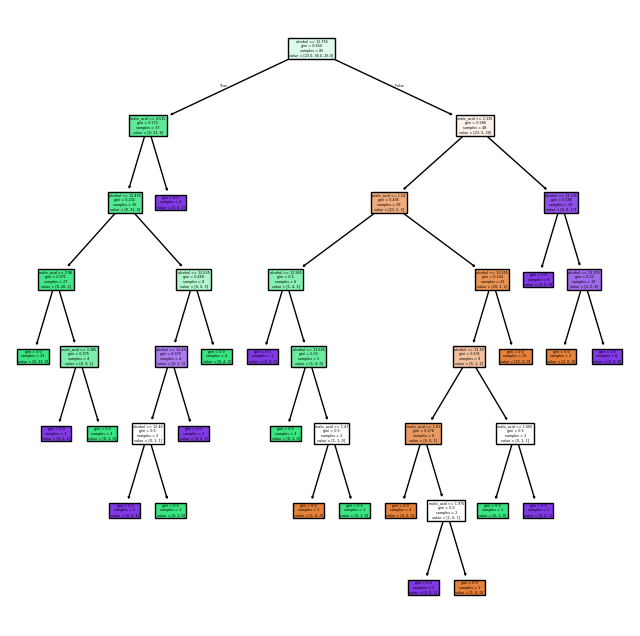

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid'])


In [43]:
# Grid Search로 최적의 파라미터 찾기
params = {'max_depth':[1, 2, 3, 4, 5]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
gs.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5]})

In [45]:
# 제시한 하이퍼파라미터 중 최적의 파라미터 확인
gs.best_estimator_


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Grid Search로 찾은 최적의 파라미터로 모델 선정하기
model = gs.best_estimator_

### 의사결정트리  13개 feature 사용

In [46]:
# 모델의 이해를 위해 Feature를 13개만 사용
X = df[wine.feature_names]
y = df['target']

In [48]:
# 모델 학습 (max_depth= None 일 때)
model = DecisionTreeClassifier(max_depth = 4, random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("검증용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(test_X, test_y)))

훈련 데이터셋 accuracy: 0.9294117647058824
검증용 데이터셋 accuracy: 0.7017543859649122
평가용 데이터셋 accuracy: 0.8055555555555556


[Text(0.4875, 0.9, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.25, 0.7, 'malic_acid <= 4.515\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.36875, 0.8, 'True  '),
 Text(0.2, 0.5, 'alcohol <= 12.435\ngini = 0.202\nsamples = 35\nvalue = [0, 31, 4]'),
 Text(0.1, 0.3, 'malic_acid <= 2.96\ngini = 0.071\nsamples = 27\nvalue = [0, 26, 1]'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(0.15, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.3, 0.3, 'alcohol <= 12.635\ngini = 0.469\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(0.25, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.725, 0.7, 'malic_acid <= 2.335\ngini = 0.586\nsamples = 48\nvalue = [23, 5, 20]'),
 Text(0.60625, 0.8, '  False'),
 Text(0.6, 0.5, 'malic_acid <= 1.54\ngini = 0.435\nsamples = 29\nvalue = [21, 

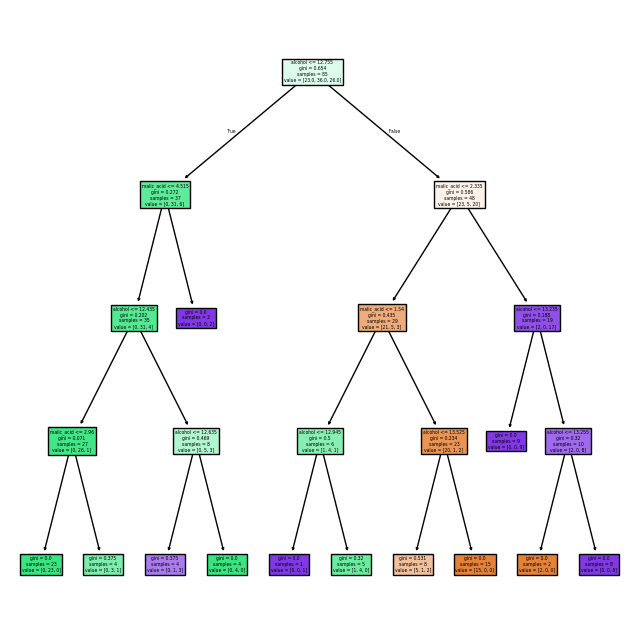

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(model, filled=True, feature_names=wine.feature_names)

In [54]:
# Grid Search로 최적의 파라미터 찾기
params = {'max_depth':[1, 2, 3, 4, 5]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
gs.fit(train_X, train_y)
# 제시한 하이퍼파라미터 중 최적의 파라미터 확인
print(gs.best_estimator_)

DecisionTreeClassifier(max_depth=3, random_state=42)


In [55]:
# 모델 학습 (max_depth= None 일 때)
model = DecisionTreeClassifier(max_depth = 3, random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("검증용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(test_X, test_y)))

훈련 데이터셋 accuracy: 0.8705882352941177
검증용 데이터셋 accuracy: 0.7192982456140351
평가용 데이터셋 accuracy: 0.8333333333333334


[Text(0.4583333333333333, 0.875, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.25, 0.625, 'malic_acid <= 4.515\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'alcohol <= 12.435\ngini = 0.202\nsamples = 35\nvalue = [0, 31, 4]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.071\nsamples = 27\nvalue = [0, 26, 1]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.6666666666666666, 0.625, 'malic_acid <= 2.335\ngini = 0.586\nsamples = 48\nvalue = [23, 5, 20]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'malic_acid <= 1.54\ngini = 0.435\nsamples = 29\nvalue = [21, 5, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.234\nsamples = 23\nvalue = [20, 1, 2]'),
 Text(0.8333333333333334, 

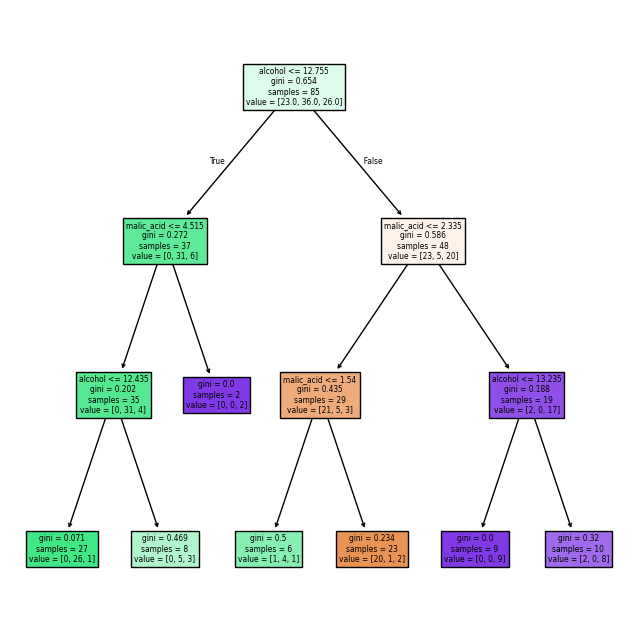

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid'])


In [58]:
# 모델 평가
scores= cross_validate(model, train_X, train_y)
np.mean(scores['test_score'])

0.7746305418719212

In [59]:
print("테스트 데이터셋 accuracy: {}".format(model.score(test_X, test_y)))

테스트 데이터셋 accuracy: 0.8333333333333334


## 랜덤포레스트

In [117]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2, random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))


훈련 데이터셋 accuracy: 0.8588235294117647
평가용 데이터셋 accuracy: 0.7719298245614035


In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=42)
model.fit(train_X, train_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_X, train_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(test_X, test_y)))

훈련 데이터셋 accuracy: 0.9014084507042254
평가용 데이터셋 accuracy: 0.9166666666666666


## XGBoost

In [130]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 50, learning_rate = 0.1, max_depth=2)

model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))


훈련 데이터셋 accuracy: 0.8941176470588236
평가용 데이터셋 accuracy: 0.8070175438596491


In [136]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(n_estimators = 50, learning_rate = 0.1, max_depth=2)

xg_model.fit(train_X, train_y)

print("훈련 데이터셋 accuracy: {}".format(xg_model.score(train_X, train_y)))
print("평가용 데이터셋 accuracy: {}".format(xg_model.score(test_X, test_y)))


훈련 데이터셋 accuracy: 0.8943661971830986
평가용 데이터셋 accuracy: 0.8888888888888888


## 결론

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=4, random_state=42)
rf_model.fit(train_X, train_y)
print("훈련 데이터셋 accuracy: {}".format(rf_model.score(train_X, train_y)))
print("평가용 데이터셋 accuracy: {}".format(rf_model.score(test_X, test_y)))

훈련 데이터셋 accuracy: 0.9014084507042254
평가용 데이터셋 accuracy: 0.9166666666666666


### XGBoost

In [105]:
from xgboost import XGBClassifier

xg_model = XGBClassifier(n_estimators = 50, learning_rate = 0.1, max_depth=2)

#xg_model = XGBClassifier(random_state=42)
xg_model.fit(train_X, train_y)
print("훈련 데이터셋 accuracy: {}".format(xg_model.score(train_X, train_y)))
print("평가용 데이터셋 accuracy: {}".format(xg_model.score(test_X, test_y)))

훈련 데이터셋 accuracy: 0.8943661971830986
평가용 데이터셋 accuracy: 0.8888888888888888
